<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h3 align="center">Instructor: Dr. Pilaram</h3>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>
<h4 align="center">Computer Assignment 2</h4>


### Importing necessary libraries

In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy.linalg as la
import sympy as sp
from skimage.color import rgb2gray

# Problem 1:
### 1-1 Linear dependency check
Write a function `is_dependent(vectors)` that takes an arbitrary number of vectors (you can assume that the vectors are represented as an $m \times n$ matrix) and returns **`True`** if the vectors are linearly independent and **`False`** if they are dependent. Note that you are not allowed to use library functions. You may use your code from the last assignment.


In [14]:
## To Do

def rref(matrix):

    A = np.float_(matrix)
    
    rows = A.shape[0]
    cols = A.shape[1]
    
    row = 0
    
    for col in range(cols):
        if row >= rows:
            break
        
        pivot_row = None
        for i in range(row, rows):
            if A[i][col] != 0:
                pivot_row = i
                break
        
        if pivot_row is None:
            continue
        
        if pivot_row != row:
            A[[row,pivot_row]] = A[[pivot_row,row]]
        
        pivot = A[row][col]
        A[row,:] /= pivot
        
        for i in range(rows):
            if i != row and A[i][col] != 0:
                factor = A[i][col]
                A[i,:] = A[i,:] - factor * A[row,:]
        
        row += 1

    return A

def rank_of_matrix(matrix):
    
    rrefMatrix = rref(matrix)

    rank = 0

    for i in range(rrefMatrix.shape[0]):
        isOne = False
        for j in range(rrefMatrix.shape[1]):
            if abs(rrefMatrix[i][j]) == 1 :
                isOne = True
                break
        if isOne == True:
            rank += 1
                
    return rank

def is_dependent(vectors):
    # Codes go here

    rank = rank_of_matrix(vectors)
    max_rank = np.min(vectors.shape)

    if rank == max_rank:
        isDependent = True
    else:
        isDependent = False

    return isDependent


The code below, is actually an evaluation cell for checking the validity of my code.

In [489]:
# Evaluation Cell for Dependency

myprint = False  # Set this to True to see test cases
np.random.seed(42)

for i in range(500):
    n = np.random.randint(2, 10)
    m = np.random.randint(2, 10)
    A = np.random.randint(-10, 10, size=(n, m))  
    max_rank = np.min([n,m])
    rank = np.linalg.matrix_rank(A)
    user_result = is_dependent(A)
    
    if rank == max_rank:
        isDependent = True
    else:
        isDependent = False

    if myprint:
        print(f"\nTest Case {i + 1}:")
        print("Matrix A:")
        print(A)
        print("Rank:")
        print(rank)
        print("Expected Result (Dependency):")
        print(isDependent)
        print("User Result (Dependency):")
        print(user_result)

    assert user_result == isDependent, "Test Case Failed"
    
print("All test cases passed!")


All test cases passed!


### 1-2 Gram–Schmidt
Write a function `gram_schmidt(vectors)` that takes arbitrary vectors as input and uses the Gram–Schmidt orthogonalization procedure to find an orthonormal basis for the space spanned by them.


In [244]:
## To Do
def gram_schmidt(vectors):
    # Codes go here

    A = np.float_(np.transpose(vectors))
    independent_vectors = A
    orthonormal_vectors = np.zeros_like(independent_vectors)
    R_matrix = np.float_(np.zeros((A.shape[0],A.shape[0])))

    for i in range(independent_vectors.shape[0]):
        if i == 0:
            orthonormal_vectors[i,:] = independent_vectors[i,:] / la.norm(independent_vectors[i,:])
            R_matrix[i,i] = la.norm(independent_vectors[i,:])
        else:
            for j in range(i):
                orthonormal_vectors[i,:] -= np.dot(independent_vectors[i,:],orthonormal_vectors[j,:]) * orthonormal_vectors[j,:]
                R_matrix[j,i] = np.dot(independent_vectors[i,:],orthonormal_vectors[j,:])

            orthonormal_vectors[i,:] += independent_vectors[i,:]
            R_matrix[i,i] = la.norm(orthonormal_vectors[i,:])
            orthonormal_vectors[i,:] = orthonormal_vectors[i,:] / la.norm(orthonormal_vectors[i,:])
                
    return orthonormal_vectors , R_matrix

### 1-3 QR Decomposition
Use `gram_schmidt` function from previous part and implement `QR_decompose(Matrix)` function that takes a matrix as an input and return related $Q$ and $R$.

In [237]:
## To Do
def QR_decompose(Matrix):
    # Codes go here
    
    QT , R = gram_schmidt(Matrix)
    Q = np.transpose(QT)

    return Q , R

In [491]:
# Evaluation Cell for QR Decomposition

myprint = False  # Set this to True to see test cases
np.random.seed(42)
test_case = 1

for i in range(500):
    n = np.random.randint(2, 10)
    m = np.random.randint(2, 10)
    A = np.random.randint(-10, 10, size=(n, m))  
    rank = rank_of_matrix(A)
    
    if rank == m:                                # QR Decomposition is feasible for matrices(n*m) with rank = m
        user_Q , user_R = QR_decompose(A)
        reconstructed_A = np.dot(user_Q,user_R)

        if myprint:
            print(f"\nTest Case {test_case}:")
            print("Matrix A:")
            print(A)
            print("User Q:")
            print(user_Q)
            print("User R:")
            print(user_R)
            print("Reconstructed A:")
            print(reconstructed_A)
            test_case += 1

        assert la.norm(np.float_(A) - reconstructed_A) < 1e-10, "Test Case Failed"
    
print("All test cases passed!")


All test cases passed!


### 1-4 Eigenvalues
We can use QR factorization to compute the eigenvalues of a matrix. Write a function `QR_iteration(matrix)` that takes a matrix as input and returns the eigenvalues of that matrix.

### **Bonus**

As you observed, the algorithm converges very slowly. There are several ways to improve the efficiency of the algorithm. Research these methods and re-implement the previous algorithm. Compare both implementations based on the number of iterations needed to converge.


In [367]:
## To Do
def QR_iteration(matrix):
    # Codes go here

    iteration = 10000  # A very large value

    A_k = matrix

    for i in range(iteration):
        Q_k , R_k = QR_decompose(A_k)
        A_k = np.dot(R_k,Q_k)

    eigenvalues = np.zeros(matrix.shape[0])

    for i in range(matrix.shape[0]):
            eigenvalues[i] = A_k[i,i]

    return eigenvalues

As you can see, this algorithm converges very slowly and it also throws error for some test cases; to solve this, we should increase the iteration parameter but it actually makes it to converge way slower than before. Therefore, we use an improved algorithm which converges very faster. I have put further explanations in the following parts.

In [368]:
# Evaluation Cell for Eigenvalues (using QR decomposition)

myprint = True  # Set this to True to see test cases
np.random.seed(42)
test_case = 1

for i in range(500):
    n = np.random.randint(2, 10)
    A = np.random.randint(-10, 10, size=(n, n))  
    rank = rank_of_matrix(A)
    expected_eigenvalues , expected_eigenvectors = la.eig(A)
    
    if rank == n and np.isrealobj(expected_eigenvalues):
        user_eigenvalues = np.sort(QR_iteration(A))
        expected_eigenvalues , expected_eigenvectors = la.eig(A)
        expected_eigenvalues = np.sort(expected_eigenvalues)

        if myprint:
            print(f"\nTest Case {test_case}:")
            print("Matrix A:")
            print(A)
            print("User Eigenvalues:")
            print(user_eigenvalues)
            print("Expected Eigenvalues:")
            print(expected_eigenvalues)
            test_case += 1

        assert la.norm(user_eigenvalues - expected_eigenvalues) < 1e-5, "Test Case Failed"
        
print("All test cases passed!")



Test Case 1:
Matrix A:
[[-3 -7]
 [-5 -3]]
User Eigenvalues:
[-8.91607978  2.91607978]
Expected Eigenvalues:
[-8.91607978  2.91607978]

Test Case 2:
Matrix A:
[[-1  1]
 [ 6 -5]]
User Eigenvalues:
[-6.16227766  0.16227766]
Expected Eigenvalues:
[-6.16227766  0.16227766]

Test Case 3:
Matrix A:
[[-6  0 -5]
 [ 7 -1 -7]
 [-2 -5 -9]]
User Eigenvalues:
[-11.          -8.60327781   3.60327781]
Expected Eigenvalues:
[-11.          -8.60327781   3.60327781]

Test Case 4:
Matrix A:
[[-6 -5]
 [ 1 -1]]
User Eigenvalues:
[-4.61803399 -2.38196601]
Expected Eigenvalues:
[-4.61803399 -2.38196601]

Test Case 5:
Matrix A:
[[-4 -8]
 [-8  7]]
User Eigenvalues:
[-8.20824392 11.20824392]
Expected Eigenvalues:
[-8.20824392 11.20824392]

Test Case 6:
Matrix A:
[[ 2  0]
 [ 2 -1]]
User Eigenvalues:
[-1.  2.]
Expected Eigenvalues:
[-1.  2.]

Test Case 7:
Matrix A:
[[4 6]
 [2 8]]
User Eigenvalues:
[ 2. 10.]
Expected Eigenvalues:
[ 2. 10.]

Test Case 8:
Matrix A:
[[-3 -9  2  5]
 [-9  0 -1  4]
 [ 6 -3  7 -2]
 [-3  

AssertionError: Test Case Failed

In [494]:
## To Do
def QR_iteration_improved(matrix):
    # Codes go here

    iteration = 1000  # A lower value than the previous algorithm

    A_k = matrix

    eigenvalues, eigenvectors = la.eig(matrix)

    for i in range(iteration):
        Q_k , R_k = QR_decompose(A_k - np.eye(A_k.shape[0])*A_k[A_k.shape[0]-1,A_k.shape[0]-1]/3)
        A_k = np.dot(R_k,Q_k) + np.eye(A_k.shape[0])*A_k[A_k.shape[0]-1,A_k.shape[0]-1]/3

        my_eigenvalues = np.zeros(matrix.shape[0])

        for j in range(matrix.shape[0]):
            my_eigenvalues[j] = A_k[j,j]
        
        if (np.round(np.sort(my_eigenvalues),8) == np.round(np.sort(eigenvalues),8)).all():
            break

    return my_eigenvalues

So I used the below algorithm to improve my algorithm. As you can see, it converges way faster with a lower iteration parameter.

![picture](IterationAlgorithm.PNG)

A possible value $ s_k $ is the last element of the main diagonal of matrix $ A_k $ , which in here I used $ s_k/3 $ ; (If you use $ s_k $, In some cases where all the elements on the main diagonal are equal, It would be problematic)
.

In [493]:
# Evaluation Cell for Eigenvalues (using QR decomposition)

myprint = False  # Set this to True to see test cases
np.random.seed(42)
test_case = 1

for i in range(500):
    n = np.random.randint(2, 10)
    A = np.random.randint(-10, 10, size=(n, n))  
    rank = rank_of_matrix(A)
    expected_eigenvalues , expected_eigenvectors = la.eig(A)
    
    if rank == n and np.isrealobj(expected_eigenvalues):
        user_eigenvalues = np.sort(QR_iteration_improved(A))
        expected_eigenvalues , expected_eigenvectors = la.eig(A)
        expected_eigenvalues = np.sort(expected_eigenvalues)

        if myprint:
            print(f"\nTest Case {test_case}:")
            print("Matrix A:")
            print(A)
            print("User Eigenvalues:")
            print(user_eigenvalues)
            print("Expected Eigenvalues:")
            print(expected_eigenvalues)
            test_case += 1

        assert la.norm(user_eigenvalues - expected_eigenvalues) < 1e-5, "Test Case Failed"
        
print("All test cases passed!")


All test cases passed!


# Problem 2:
### 2-1 Singular Value Decomposition
Define a function called `singular_value_decompose(Matrix)` that compute the SVD of a matrix using eigenvalues and eigenvectors.







In [495]:
def singular_value_decompose(Matrix):
    # Codes go here

    U, S, Vh = la.svd(Matrix, full_matrices = False)  # Using built-in functions in numpy

    return U, S, Vh


### 2-2 Image Compression using SVD

SVD (Singular Value Decomposition) is an incredibly powerful tool for image compression, offering a perfect balance between maintaining quality and reducing file size. It’s especially useful for applications where images need to look great but saving storage space or bandwidth is crucial. SVD works by breaking down an image into its essential components, keeping the most important information, and discarding the rest.

#### Understanding SVD in Image Processing

SVD decomposes a matrix $A$ into three parts: $U$, $\Sigma$, and $V^H$, such that:

$$
A = U \Sigma V^H
$$

Each component plays a specific role in image processing:

- **$U$**: Represents the patterns or features in the image.
- **$\Sigma$**: The "heart" of SVD, containing singular values that indicate the significance of each feature.
- **$V^H$**: Acts as a map, showing how the features combine to reconstruct the image.

The real magic lies in $\Sigma$. Most of the important visual information is concentrated in a few singular values, while the rest contribute only minor details or noise. By keeping only the significant singular values and discarding the rest, we can effectively compress the image with minimal quality loss. Think of it as packing only your favorite clothes for a trip instead of your entire wardrobe!

#### What to Do

1. Start by reading the image file `cat.jpg`. This is an RGB image.
2. Convert the RGB image to grayscale to simplify processing.
3. Compute the SVD of the grayscale image. You **are allowed** to use library functions to perform this step.
4. Reconstruct the image by eliminating insignificant singular values. This step compresses the image by discarding unnecessary information while retaining its quality.

By following these steps, you'll gain hands-on experience with how SVD simplifies and compresses complex data while preserving the essential features of an image.



![picture](svd.png)

Plot the original and reconstructed images side by side to visually compare the quality. Perform the compression using different numbers of selected singular values to observe how the level of compression affects the image quality. Analyze the trade-off between retaining visual details and reducing the amount of data.

![picture](reducedcat.png)

In [426]:
cat_image = mpimg.imread('cat.jpg')
grayscale = rgb2gray(cat_image)
U, S, Vh = singular_value_decompose(grayscale)

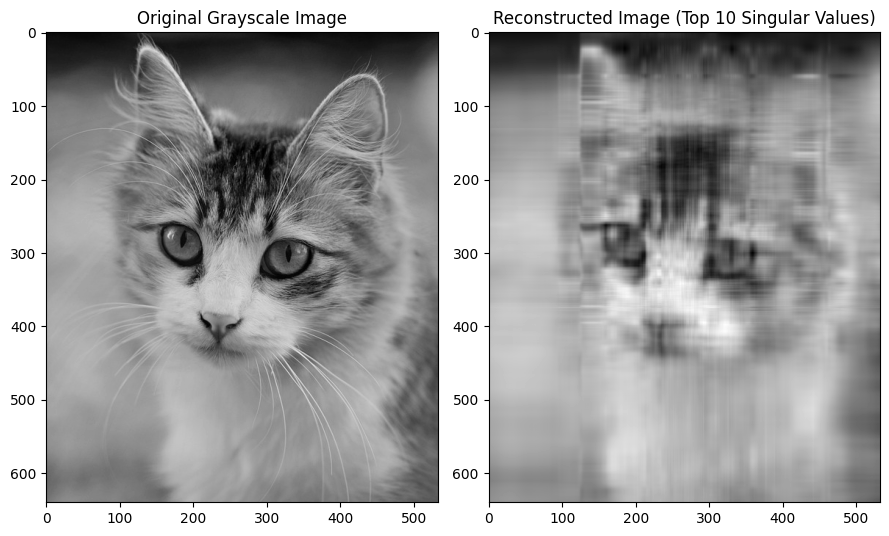

In [434]:
n = 10
a = np.dot(U[:,:n],np.diag(S[:n]))
reconstructed_image = np.dot(a,Vh[:n,:])

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.title('Original Grayscale Image')
        
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image,cmap=plt.cm.gray)
plt.title('Reconstructed Image (Top 10 Singular Values)')

plt.tight_layout()
plt.show()

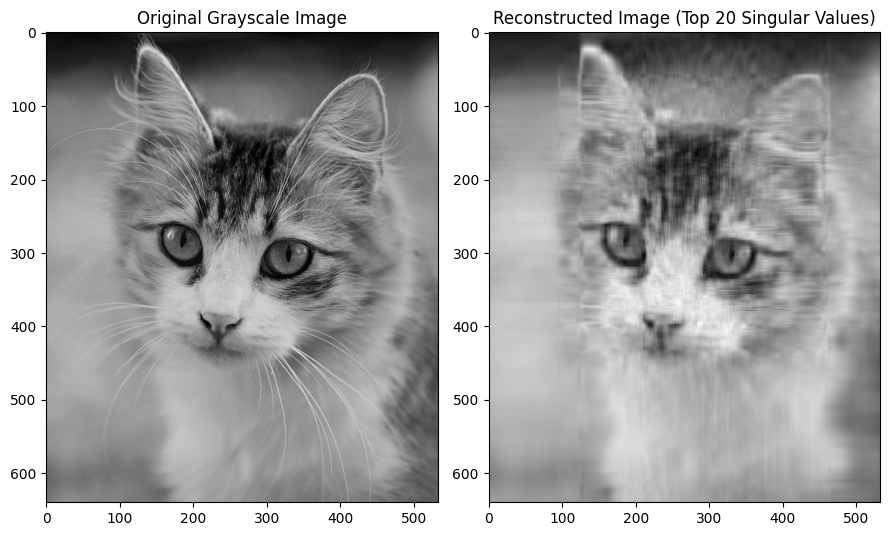

In [435]:
n = 20
a = np.dot(U[:,:n],np.diag(S[:n]))
reconstructed_image = np.dot(a,Vh[:n,:])

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.title('Original Grayscale Image')
        
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image,cmap=plt.cm.gray)
plt.title('Reconstructed Image (Top 20 Singular Values)')

plt.tight_layout()
plt.show()

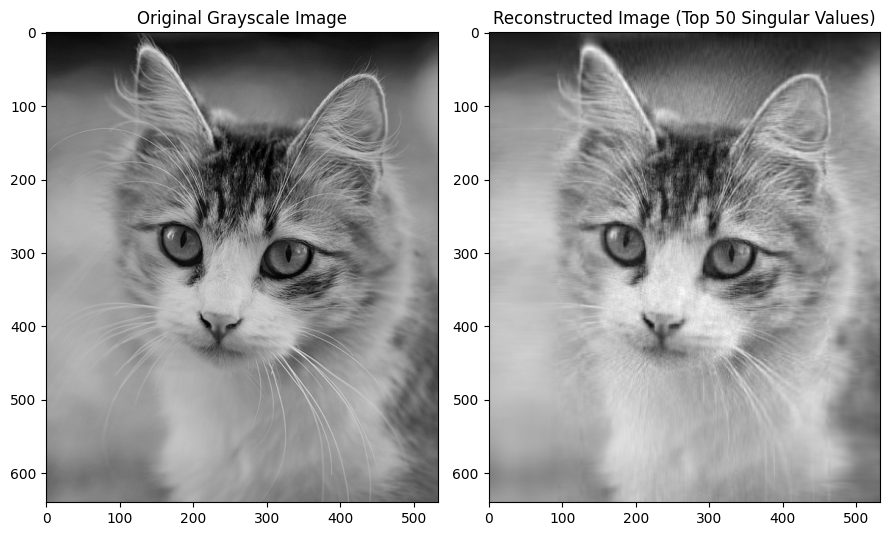

In [437]:
n = 50
a = np.dot(U[:,:n],np.diag(S[:n]))
reconstructed_image = np.dot(a,Vh[:n,:])

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.title('Original Grayscale Image')
        
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image,cmap=plt.cm.gray)
plt.title('Reconstructed Image (Top 50 Singular Values)')

plt.tight_layout()
plt.show()

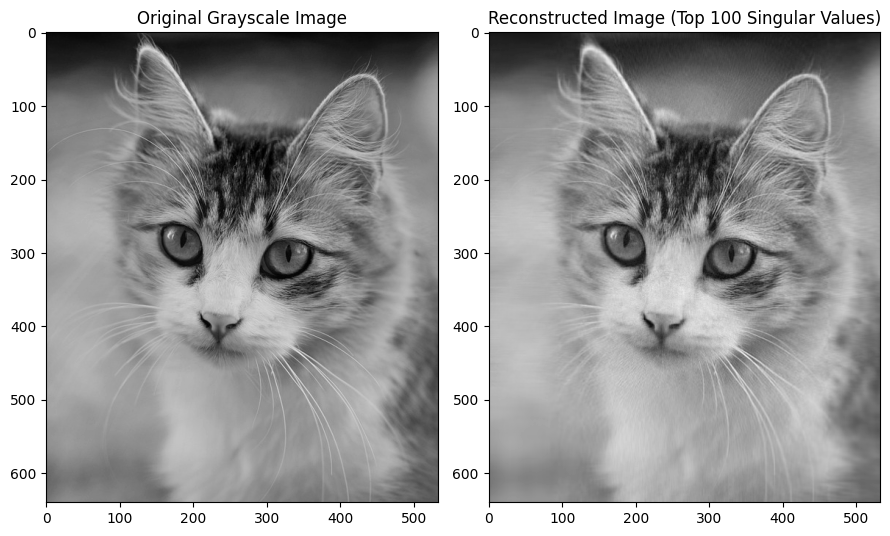

In [438]:
n = 100
a = np.dot(U[:,:n],np.diag(S[:n]))
reconstructed_image = np.dot(a,Vh[:n,:])

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.title('Original Grayscale Image')
        
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image,cmap=plt.cm.gray)
plt.title('Reconstructed Image (Top 100 Singular Values)')

plt.tight_layout()
plt.show()

The more we increase the number of selected singular values, the more quality we get. But we also use more space and memory.

`` (Bonus) `` Use your own code from the previous parts to compress the image. Display the compressed images side by side and compare them to evaluate the effectiveness of your implementation. Analyze how well the compression preserves image quality across different levels of compression

In [498]:
eigenvalues , eigenvectors = la.eig(np.dot(np.transpose(grayscale),grayscale))  # The improved QR iteration algorithm can be used here.
S = np.sqrt(np.diag(eigenvalues))                                               # But it takes too much time to be executed.
V = eigenvectors
Vh = np.transpose(V)
U = np.zeros((grayscale.shape[0],V.shape[1]))
for i in range(V.shape[1]):
    U[:,i] = np.dot(grayscale,V[:,i])/np.sqrt(eigenvalues[i])

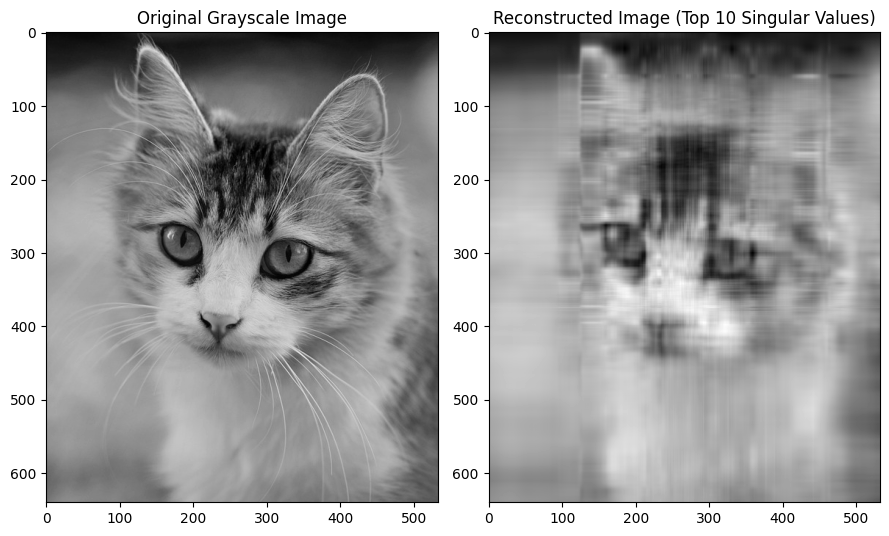

In [499]:
n = 10

a = np.dot(U[:,:n],S[:n,:n])
reconstructed_image = np.dot(a,Vh[:n,:])

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.title('Original Grayscale Image')
        
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image,cmap=plt.cm.gray)
plt.title('Reconstructed Image (Top 10 Singular Values)')

plt.tight_layout()
plt.show()

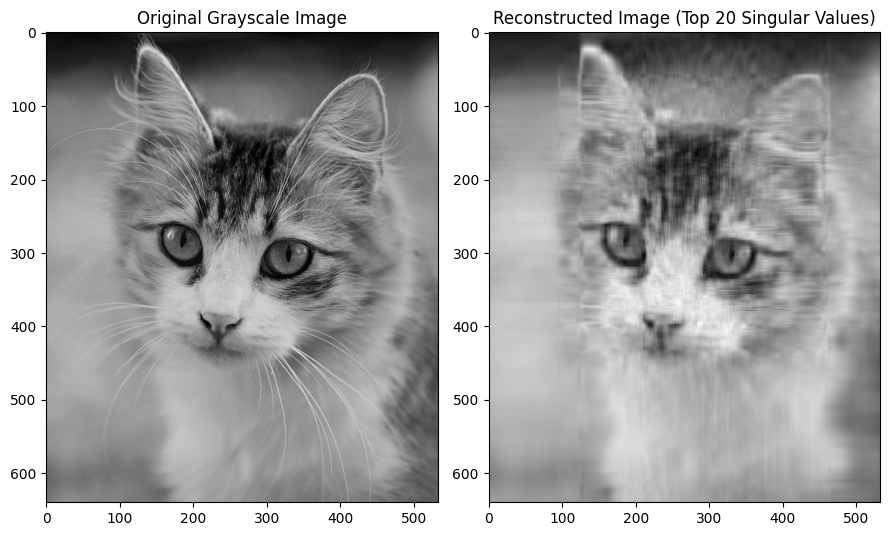

In [500]:
n = 20

a = np.dot(U[:,:n],S[:n,:n])
reconstructed_image = np.dot(a,Vh[:n,:])

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.title('Original Grayscale Image')
        
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image,cmap=plt.cm.gray)
plt.title('Reconstructed Image (Top 20 Singular Values)')

plt.tight_layout()
plt.show()

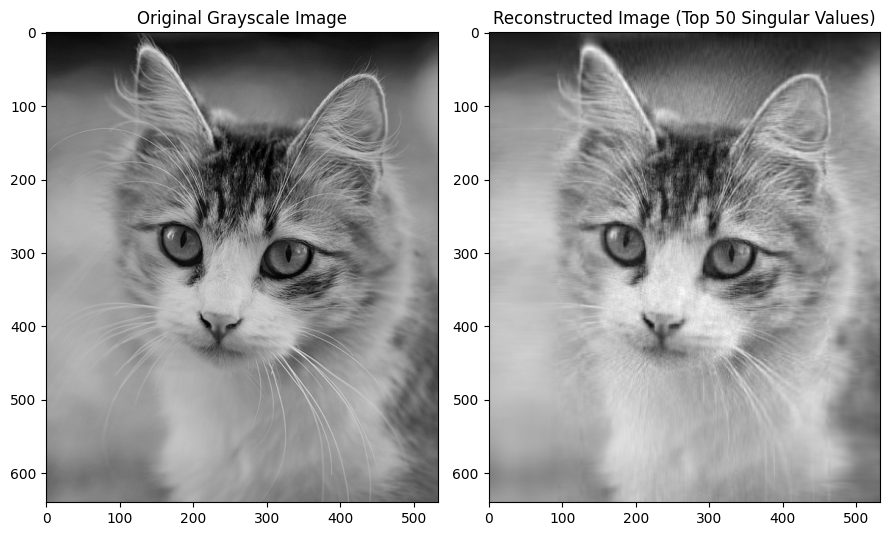

In [501]:
n = 50

a = np.dot(U[:,:n],S[:n,:n])
reconstructed_image = np.dot(a,Vh[:n,:])

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.title('Original Grayscale Image')
        
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image,cmap=plt.cm.gray)
plt.title('Reconstructed Image (Top 50 Singular Values)')

plt.tight_layout()
plt.show()

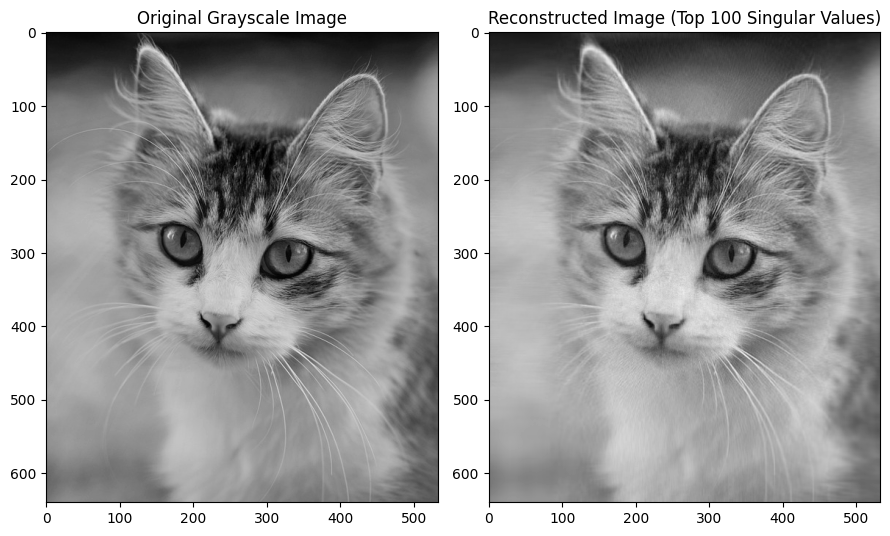

In [502]:
n = 100

a = np.dot(U[:,:n],S[:n,:n])
reconstructed_image = np.dot(a,Vh[:n,:])

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.title('Original Grayscale Image')
        
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image,cmap=plt.cm.gray)
plt.title('Reconstructed Image (Top 100 Singular Values)')

plt.tight_layout()
plt.show()

# Problem 3:  
### Geometric Image Transformations  

Geometric transformations alter the spatial relationships between pixels in an image. These transformations are often referred to as "rubber-sheet transformations" because they can be visualized as "printing" the image onto a flexible sheet and stretching or reshaping it according to specific rules. During the course, you explored some of these transformations.

For this task:  
1. Load the image file `T.jpg`.  
2. Perform the following transformations on the image:  
   - **Rotation**  
   - **Scaling**  
   - **Translation**  
   - **Shear** (both horizontal and vertical)  
3. Display and attach the results of each transformation for comparison.  

Analyze how each transformation affects the geometry and visual appearance of the image.


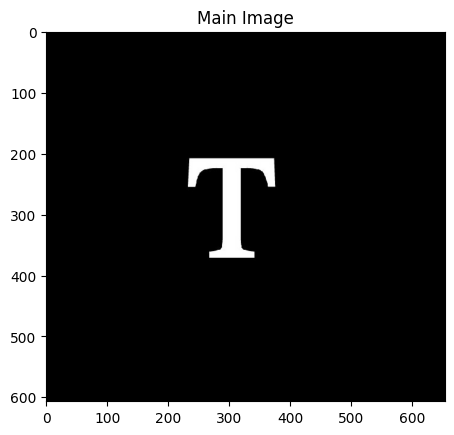

In [442]:
img = mpimg.imread('T.jpg')
 
plt.imshow(img)
plt.title('Main Image')
plt.show()
img.shape

origin_x = 327
origin_y = 303

#### Rotation

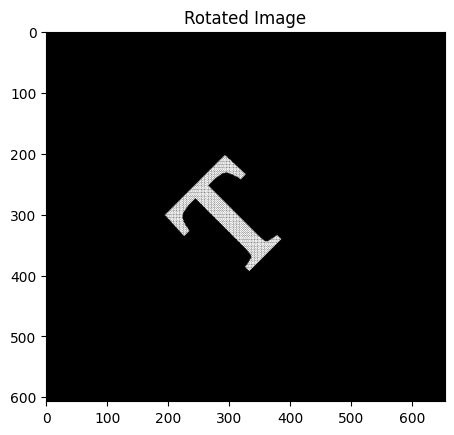

In [80]:
theta = 45  # Change to get different rotation angles
theta_rad = theta / 180 * np.pi
rotation_matrix = np.array([[np.cos(theta_rad),-np.sin(theta_rad)],[np.sin(theta_rad),np.cos(theta_rad)]])
new_img = np.zeros_like(img)

for i in range(img.shape[1]):
    for j in range(img.shape[0]):
        x = i - origin_x
        y = origin_y - j
        coordinate = np.array([x,y])
        new_coordinate = np.round(np.dot(rotation_matrix,coordinate)).astype(np.int16)
        new_x = new_coordinate[0] + origin_x
        new_y = origin_y - new_coordinate[1]

        if new_x < 655:
            if new_y < 607:
                new_img[new_y,new_x,:] = img[j,i,:]
        
plt.imshow(new_img)
plt.title('Rotated Image')
plt.show()

#### Scaling

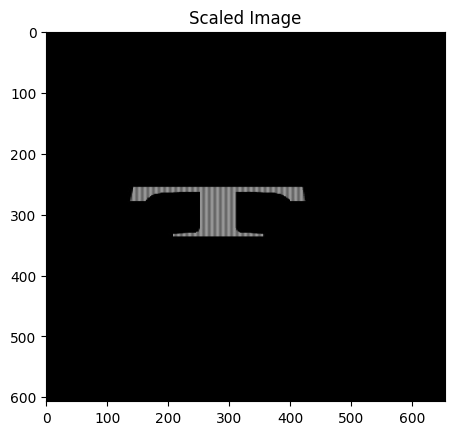

In [79]:
S_x = 2    # Scaling Coefficient Along x-Axis
S_y = 0.5    # Scaling Coefficient Along y-Axis
scaling_matrix = np.array([[S_x,0],[0,S_y]])
new_img = np.zeros_like(img)

for i in range(img.shape[1]):
    for j in range(img.shape[0]):
        x = i - origin_x
        y = origin_y - j
        coordinate = np.array([x,y])
        new_coordinate = np.round(np.dot(scaling_matrix,coordinate)).astype(np.int16)
        new_x = new_coordinate[0] + origin_x
        new_y = origin_y - new_coordinate[1]

        if new_x < 655:
            if new_y < 607:
                new_img[new_y,new_x,:] = img[j,i,:]
        
plt.imshow(new_img)
plt.title('Scaled Image')
plt.show()

#### Translation

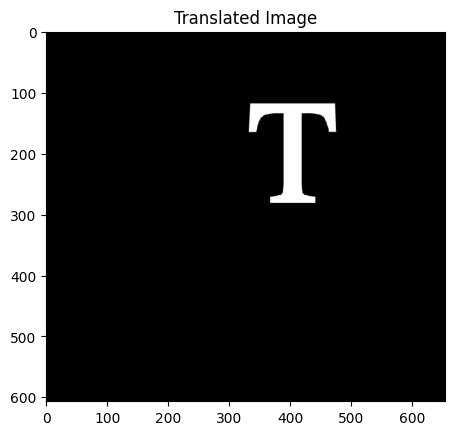

In [504]:
T_x = 100    # Translation Parameter Along x-Axis
T_y = 90    # Translation Parameter Along y-Axis
translation_matrix = np.array([[1,0,T_x],[0,1,T_y]])
new_img = np.zeros_like(img)

for i in range(img.shape[1]):
    for j in range(img.shape[0]):
        x = i - origin_x
        y = origin_y - j
        coordinate = np.array([x,y,1])
        new_coordinate = np.round(np.dot(translation_matrix,coordinate)).astype(np.int16)
        new_x = new_coordinate[0] + origin_x
        new_y = origin_y - new_coordinate[1]

        if new_x < 655:
            if new_y < 607:
                new_img[new_y,new_x,:] = img[j,i,:]
        
plt.imshow(new_img)
plt.title('Translated Image')
plt.show()

#### Shear

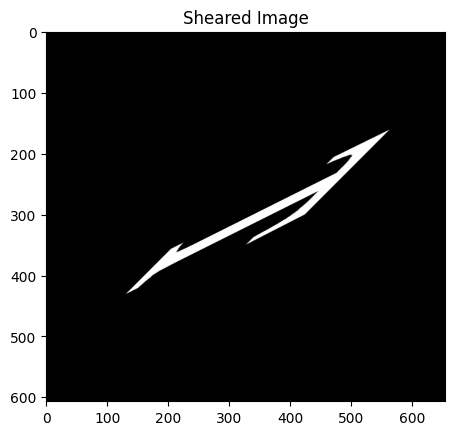

In [507]:
S = 2    # Shear Parameter Along x-Axis
T = 1    # Shear Parameter Along y-Axis
shear_matrix = np.array([[1,S],[T,1]])
##shear_matrix = np.array([[1+S*T,S],[T,1]])  ## You can use this matrix, instead of the upper one. It preserves the area, since its determinant is 1
new_img = np.zeros_like(img)

for i in range(img.shape[1]):
    for j in range(img.shape[0]):
        x = i - origin_x
        y = origin_y - j
        coordinate = np.array([x,y])
        new_coordinate = np.round(np.dot(shear_matrix,coordinate)).astype(np.int32)
        new_x = new_coordinate[0] + origin_x
        new_y = origin_y - new_coordinate[1]

        if new_x < 655:
            if new_y < 607:
                new_img[new_y,new_x,:] = img[j,i,:]
        
plt.imshow(new_img)
plt.title('Sheared Image')
plt.show()